In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def getkb(X,Y):
    k=(np.average(Y*X)-np.average(Y)*np.average(X))/(np.average(X*X)-np.average(X)**2)
    b=np.average(Y)-k*np.average(X)
    def av(n):
        return np.average(n)
    sigk=np.sqrt(np.abs((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k))/np.sqrt(X.shape[0])
    #print((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k)
    sigb=sigk*np.sqrt(av(X*X)-av(X)**2)
    return k,b,sigk,sigb

In [3]:
P=[37.5,67.5,101.3,131.3]

-0.005915055676373 2.4566584089809416 -0.00026684148681385456 4.5115187107350986e-05
-0.0035365797915928665 2.9092942279238883 -0.0002205171517757183 3.39963843485002e-05
-0.0021300888161727744 2.7552877855498235 -0.0010372097807287558 0.00013903516245965654
-0.001894117876460782 2.7548360727707943 -0.0014027384493585989 0.0001932782378930041


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


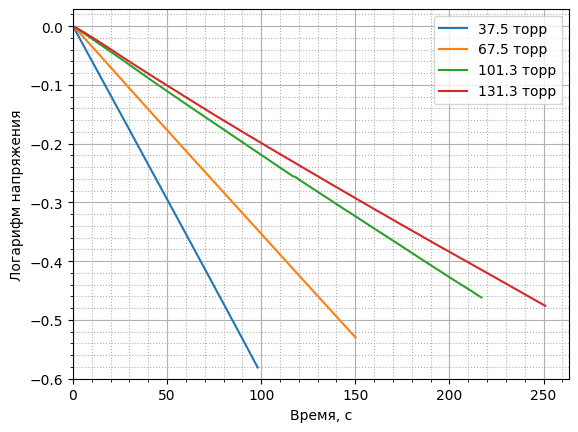

In [4]:
U=[]
tau=[]
for i in P:
    U.append(pd.read_csv(str(i)+'.csv',header=0))
    plt.plot(U[-1]['t (s)'],np.log(U[-1]['V (mV)']/U[-1]['V (mV)'][0]), label=str(i)+" торр")
    k,b,sigk,sigb=getkb(U[-1]['t (s)'],np.log(U[-1]['V (mV)']))
    print(k,b,sigk/k,sigb)
    tau.append(-1/k)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.xlabel('Время, с')
plt.ylabel('Логарифм напряжения')
plt.xlim(xmin=0)
plt.ylim(ymin=plt.gca().get_yticks()[1])
plt.legend()
plt.savefig('logP.eps')

In [5]:
tau

[np.float64(169.06011620387335),
 np.float64(282.7590663660956),
 np.float64(469.4639924905782),
 np.float64(527.9502466174549)]

0.0830840831649499 0.5139104786190336


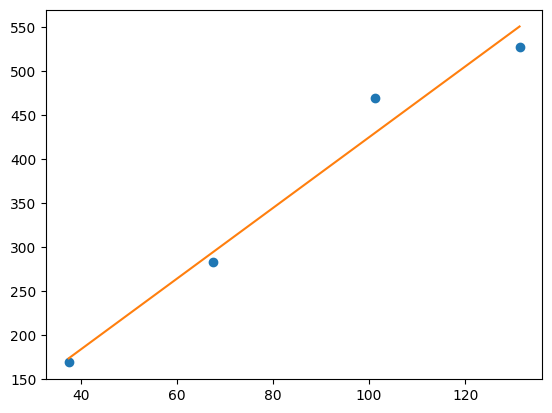

In [6]:
P=np.array(P)
tau=np.array(tau)
k,b,sigk,sigb=getkb(P,tau)
print(sigk/k,sigb/b)
plt.plot(P,tau,'o')
plt.plot(P,P*k+b)

In [7]:
V=775*1e-6
LS=530
D=(1/tau)*(V*LS/2)
Deps=np.sqrt((10/775)**2+(1/53)**2)

In [8]:
D*1e4 #in m^2/c

array([12.1480456 ,  7.26325075,  4.37466991,  3.89004459])

In [9]:
k,b,sigk,sigb=getkb(1/P,D)
print(k,b,sigk/k,sigb/b)

0.04446465951347855 3.63878535753993e-05 0.0393638190251241 0.3540430882356984


In [10]:
3.63878535753993e-05-0.00003

6.387853575399302e-06

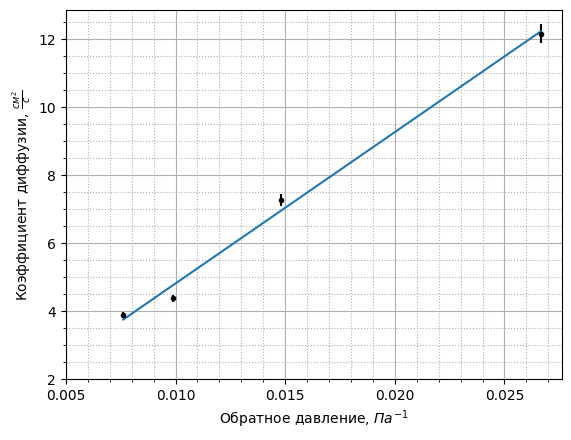

In [11]:
plt.xlabel('Обратное давление, $Па^{-1}$')
plt.ylabel(r'Коэффициент диффузии, $\frac{cм^2}{c}$')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.errorbar(1/P,D*1e4,yerr=Deps*D*1e4, fmt='.', c='black')
plt.plot(1/P,(k/P+b)*1e4)
plt.ylim(ymin=plt.gca().get_yticks()[0])
plt.xlim(xmin=plt.gca().get_xticks()[0])
plt.savefig('D.eps')

In [12]:
D760=k/760+b
D760

np.float64(9.489398451418686e-05)

In [13]:
(abs(sigk/760)**2+abs(sigb)**2)**0.5/D760

np.float64(0.13791286198076216)

In [14]:
D[0],P[0]*133.33

(np.float64(0.0012148045595351048), np.float64(4999.875000000001))

In [15]:
P[0]*133.33/(8.31*28),273+21.5

(np.float64(21.488202681794743), 294.5)

In [16]:
v=np.sqrt((294.5*8.31*8)/(np.pi*4e-3))
v

np.float64(1248.1972543698053)

In [17]:
lb=3*D[0]/v
lb

np.float64(2.9197417842785757e-06)

PV=nu*RT
P*Na/(RT)=N/V

In [18]:
sig=1/(lb*P[0]*133.33*6.02e23/(294.5*8.31))
sig

np.float64(2.7847501739104983e-19)

In [19]:
np.sqrt(sig/np.pi)

np.float64(2.977269740731837e-10)